In [1]:
from fastai.vision import *

In [2]:
#URLs.BIWI_

In [3]:
path = {}
path['biwi'] = untar_data(URLs.BIWI_SAMPLE)
print(path['biwi'])
path['biwi'].ls()

/home/ravivijay/.fastai/data/biwi_sample


[PosixPath('/home/ravivijay/.fastai/data/biwi_sample/images'),
 PosixPath('/home/ravivijay/.fastai/data/biwi_sample/centers.pkl')]

In [4]:
fn2ctr = pickle.load(open(path['biwi']/'centers.pkl', 'rb'))

In [11]:
list(fn2ctr.items())[:5]

[('0.jpg', tensor([84.0480, 84.8110])),
 ('1.jpg', tensor([74.2108, 75.8180])),
 ('2.jpg', tensor([76.7453, 89.7391])),
 ('3.jpg', tensor([62.8792, 78.3441])),
 ('4.jpg', tensor([83.3372, 85.4550]))]

In [13]:
#data = {}
data = (PointsItemList.from_folder(path['biwi'])
        .split_by_rand_pct(seed=42)
        .label_from_func(lambda o:fn2ctr[o.name])
        .transform(get_transforms() , tfm_y=True, size=(120,160))
        .databunch()
        .normalize(imagenet_stats)
       )

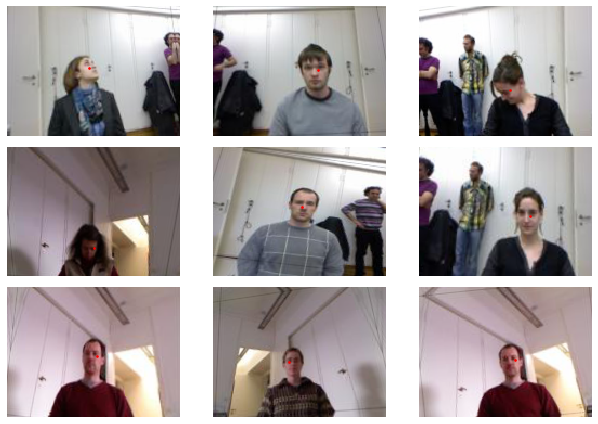

In [14]:
data.show_batch(rows=3, figsize=(9,6))

In [17]:
learn = cnn_learner(data, models.resnet18, lin_ftrs=[100], ps=0.05)
learn.fit_one_cycle(5,5e-2)

epoch,train_loss,valid_loss,time
0,1.976002,10.265066,00:01
1,4.819405,63.160744,00:00
2,3.838256,62.299377,00:00
3,3.043332,11.098781,00:00
4,2.511375,4.420663,00:01


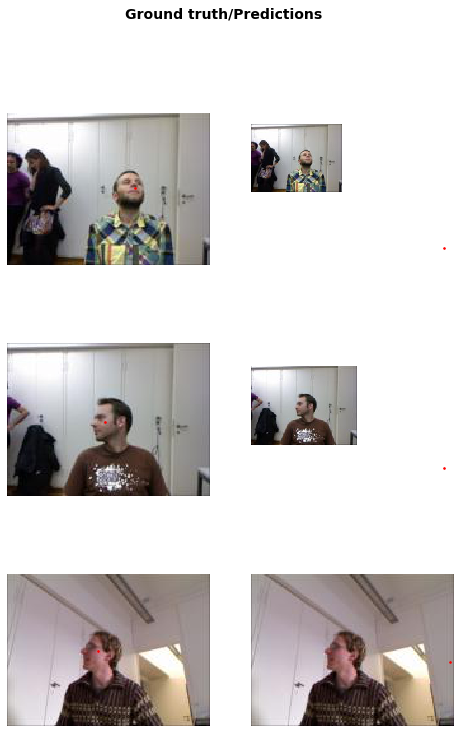

In [18]:
learn.show_results(rows=3)